# Finding the MRI Brain Tumor Detection dataset

Let's find the dataset in this linK: https://www.kaggle.com/datasets/navoneel/brain-mri-images-for-brain-tumor-detection

# Import Packages

In [2]:
import numpy as np
import torch
from torch.utils.data import Dataset, DataLoader
import glob # allows you to go through directories
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score
import cv2 #used to read the image

## Reading the images

In [53]:
tumor = [] #images of brains with tumors
path = "./data/brain_tumor_dataset/yes/*.jpg" #in the brain_tumor_dataset/yes directory, select all the files with the jpg extension

#iterate through the directory with a for loop
for f in glob.iglob(path): #iterating all paths of all the files in the target directory
    img = cv2.imread(f)
    #fix the dimensions
    img = cv2.resize(img, (128, 128))
    b, g, r = cv2.split(img) #split image into different single channeled images
    img = cv2.merge([r,g,b]) #merging the different single channel images into one multichannel image, with the order in the conventional way
    tumor.append(img) #add the image to the tumor list
    

In [54]:
healthy = [] #images of brains without tumors
path = "./data/brain_tumor_dataset/no/*.jpg" #in the brain_tumor_dataset/yes directory, select all the files with the jpg extension

#iterate through the directory with a for loop
for f in glob.iglob(path): #iterating all paths of all the files in the target directory
    img = cv2.imread(f)
    #fix the dimensions
    img = cv2.resize(img, (128, 128))
    b, g, r = cv2.split(img) #split image into different single channeled images
    img = cv2.merge([r,g,b]) #merging the different single channel images into one multichannel image, with the order in the conventional way
    healthy.append(img) #add the image to the healthy list
    

In [60]:
healthy = np.array(healthy) #convert healthy and tumor lists to numpy arrays
tumor = np.array(tumor)
All = np.concatenate((healthy, tumor))

In [70]:
np.random.choice(10,5, replace=False) #from arange of 0-5, size must be 3, no duplication

array([8, 6, 5, 9, 1])

## Visualising the Brain MRI Images

In [98]:
def plot_random(healthy, tumor, num=5):
    healthy_imgs = healthy[np.random.choice(healthy.shape[0],num, replace=False)] #this generates an array like [8, 6, 5, 9, 1]
    tumor_imgs = tumor[np.random.choice(tumor.shape[0],num, replace=False)] #this generates an array like [8, 6, 5, 9, 1]  
    
    plt.figure(figsize=(16,9))
    for i in range(num):
        plt.subplot(1, num, i+1) #1 row, 5 columns, putting it in its corresponding subplot, but subplots are 1 indexed in matplotlib
        plt.title("Healthy")
        plt.imshow(healthy_imgs[i])#place the image in that subplot
        
    plt.figure(figsize=(20,10))
    for i in range(num):
        plt.subplot(1, num, i+1) #1 row, 5 columns, putting it in its corresponding subplot, but subplots are 1 indexed in matplotlib
        plt.title("Tumor")
        plt.imshow(tumor_imgs[i])#place the image in that subplot
        

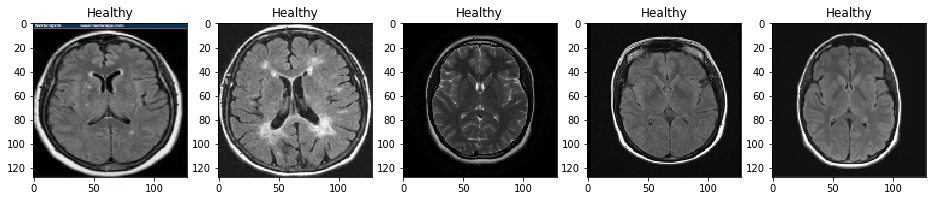

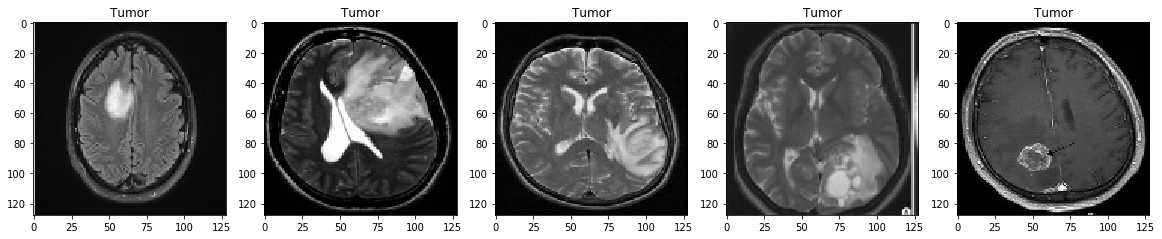

In [100]:
plot_random(healthy,tumor, num=5)